In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import warnings
warnings.filterwarnings("ignore")

# IMPORT DATASET


In [2]:
data=pd.read_csv("mushroom.csv",names=range(1,24))
data

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# DATA ANALYSIS

In [3]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
data.tail()

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
1     8124 non-null object
2     8124 non-null object
3     8124 non-null object
4     8124 non-null object
5     8124 non-null object
6     8124 non-null object
7     8124 non-null object
8     8124 non-null object
9     8124 non-null object
10    8124 non-null object
11    8124 non-null object
12    8124 non-null object
13    8124 non-null object
14    8124 non-null object
15    8124 non-null object
16    8124 non-null object
17    8124 non-null object
18    8124 non-null object
19    8124 non-null object
20    8124 non-null object
21    8124 non-null object
22    8124 non-null object
23    8124 non-null object
dtypes: object(23)
memory usage: 1.4+ MB


In [7]:
data.dtypes

1     object
2     object
3     object
4     object
5     object
6     object
7     object
8     object
9     object
10    object
11    object
12    object
13    object
14    object
15    object
16    object
17    object
18    object
19    object
20    object
21    object
22    object
23    object
dtype: object

In [8]:
#Converting object datatype values into numeric
from sklearn .preprocessing import LabelEncoder
le=LabelEncoder()
le_count=0
for col in data.columns[0:]:
   if data[col].dtype=='object':
    if len(list(data[col].unique()))<=30:
        le.fit(data[col])
        data[col]=le.transform(data[col])
        le_count +=1
print('{} columns were label encoded.',format(le_count))

{} columns were label encoded. 23


In [9]:
data

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [10]:
data.dtypes

1     int32
2     int32
3     int32
4     int32
5     int32
6     int32
7     int32
8     int32
9     int32
10    int32
11    int32
12    int32
13    int32
14    int32
15    int32
16    int32
17    int32
18    int32
19    int32
20    int32
21    int32
22    int32
23    int32
dtype: object

In [11]:
data.skew()

1     0.071946
2    -0.247052
3    -0.590859
4     0.706965
5     0.342750
6    -0.080790
7    -5.977076
8     1.840088
9     0.825797
10    0.061410
11   -0.271345
12    0.947852
13   -1.098739
14   -0.757703
15   -1.835434
16   -1.791593
17    0.000000
18   -6.946944
19    2.701657
20   -0.290018
21    0.548426
22   -1.413096
23    0.985548
dtype: float64

# VISUALIZATION

In [12]:
data.isnull().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64

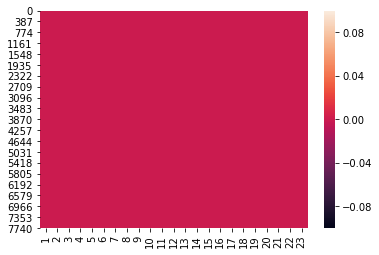

In [13]:
sns.heatmap(data.isnull())

In [14]:
data.corr()

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
1,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
2,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
3,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
4,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
5,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
6,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
7,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
8,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
9,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
10,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


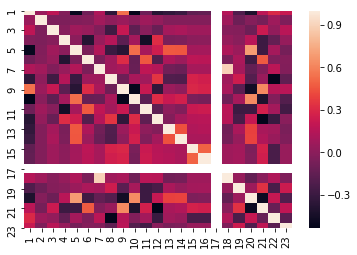

In [15]:
sns.heatmap(data.corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022194D30948>,
      dtype=object)

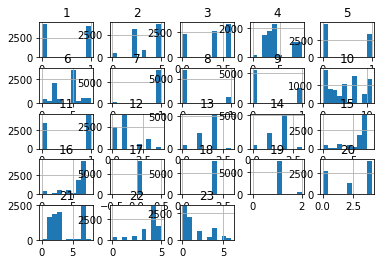

In [16]:
data.hist()

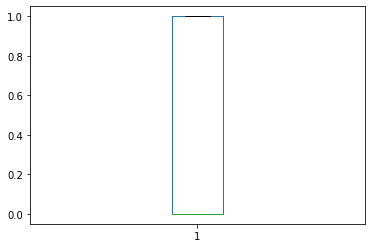

In [17]:
#Checking outliers
data[1].plot.box()

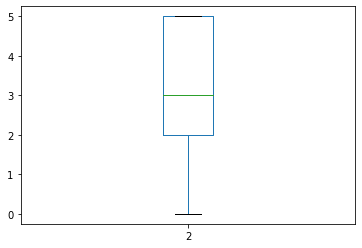

In [18]:
data[2].plot.box()

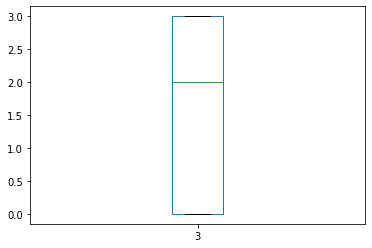

In [19]:
data[3].plot.box()

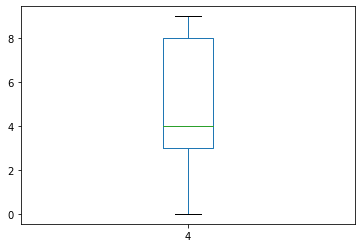

In [20]:
data[4].plot.box()

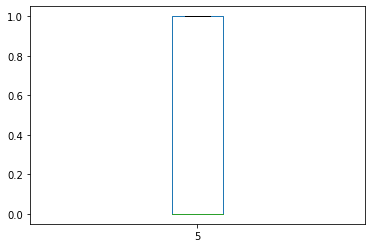

In [21]:
data[5].plot.box()

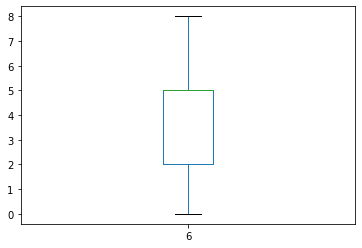

In [22]:
data[6].plot.box()

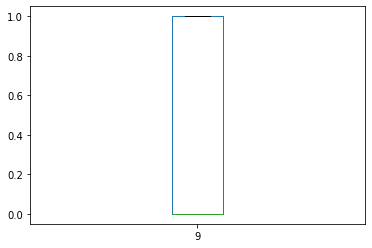

In [23]:
data[9].plot.box()

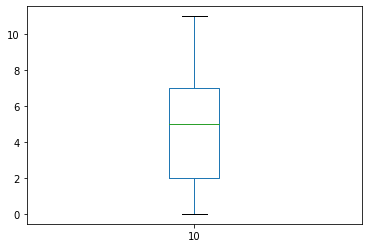

In [24]:
data[10].plot.box()

# DATA CLEANING


In [25]:
data.isnull()

,1,2,3,4,5,6,7,8,9,10,...,14,15,16,17,18,19,20,21,22,23
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8120,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8121,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8122,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
data.skew()

1     0.071946
2    -0.247052
3    -0.590859
4     0.706965
5     0.342750
6    -0.080790
7    -5.977076
8     1.840088
9     0.825797
10    0.061410
11   -0.271345
12    0.947852
13   -1.098739
14   -0.757703
15   -1.835434
16   -1.791593
17    0.000000
18   -6.946944
19    2.701657
20   -0.290018
21    0.548426
22   -1.413096
23    0.985548
dtype: float64

In [29]:
data[19]=np.log1p(data[19])

In [30]:
data[19].skew()

-0.3344280853892252

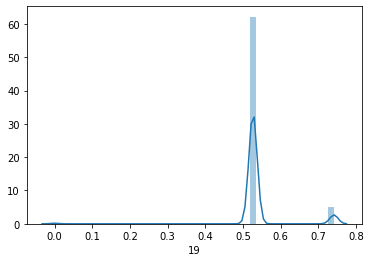

In [31]:
sns.distplot(data[19])

# SPLITTING DATA INTO X AND Y FOR TRAINING AND TESTING

In [32]:
x=data.drop(1,axis=1)
x

,2,3,4,5,6,7,8,9,10,11,...,14,15,16,17,18,19,20,21,22,23
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,0.526589,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,0.526589,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,0.526589,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,0.526589,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,0.526589,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,2,5,5,0,1,0.526589,4,0,1,2
8120,5,2,4,0,5,0,0,0,11,0,...,2,5,5,0,0,0.526589,4,0,4,2
8121,2,2,4,0,5,0,0,0,5,0,...,2,5,5,0,1,0.526589,4,0,1,2
8122,3,3,4,0,8,1,0,1,0,1,...,1,7,7,0,2,0.526589,0,7,4,2


In [34]:
y=data[1]
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: 1, Length: 8124, dtype: int32

# Apply Model and Algorithms

In [35]:
#finding the best score at best random state value
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=21)

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6093, 22)
(6093,)
(2031, 22)
(2031,)


In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [41]:
# Test Options and Evaluation Metrics
num_folds = 10
scoring='accuracy'
# Spot Check Algorithms
models = []
models.append(('lr', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('dtc', DecisionTreeClassifier()))
models.append(('rfc', RandomForestClassifier()))
models.append(('gbc', GradientBoostingClassifier()))
models.append(('svc',SVC()))
results = []
names = []
for name, model in models:
    kfold =KFold(n_splits=num_folds, random_state=22)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold,    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),   cv_results.std())
    print(msg)

lr: 0.944855 (0.005972)
KNN: 0.999015 (0.001314)
dtc: 1.000000 (0.000000)
rfc: 1.000000 (0.000000)
gbc: 1.000000 (0.000000)
svc: 0.981289 (0.003140)


In [42]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
import warnings
warnings.filterwarnings("ignore")
# Build parameter grid
params= {'max_depth':[10,20,30,40,50],
         'min_samples_split':[2,3,4,7,10],
         'min_samples_leaf' :[1,3,5,10],
         'max_features':['sqrt','log2'],
         "criterion": ["gini", "entropy"]}
# Build the model
model = DecisionTreeClassifier()
kfold = KFold(n_splits=num_folds, random_state=10)
grid = GridSearchCV(estimator=model, param_grid=params, scoring=scoring, cv=kfold)
grid_result = grid.fit(x_train, y_train)
# Show the results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3}
0.998195 (0.002886) with: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
0.999508 (0.000752) with: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3}
0.998031 (0.002727) with: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4}
0.997538 (0.004101) with: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 7}
0.999015 (0.001505) with: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10}
0.996553 (0.004117) with: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2}
0.998851 (0.001478) with: {'criterion': 'gini', 'max

In [43]:
from sklearn.model_selection import cross_val_predict

In [44]:
dtc=DecisionTreeClassifier(criterion= 'gini',max_depth= 20,max_features='sqrt',min_samples_leaf= 1,min_samples_split= 3)
score=cross_val_score(dtc,x,y,cv=5,scoring='accuracy')

print('accuracy Score=',score)
print('Mean Scores',score.mean())
print('Standard Deviation',score.std())

y_pred=cross_val_predict(dtc,x,y,cv=5)
print('Y Prediction values')
print(y_pred)
conf_mat=confusion_matrix(y,y_pred)
conf_mat
print(classification_report(y,y_pred))

from sklearn.metrics import accuracy_score
accuracy_score(y,y_pred)

accuracy Score= [0.84255843 1.         1.         1.         0.68965517]
Mean Scores 0.9064427195996098
Standard Deviation 0.1243679522903184
Y Prediction values
[0 0 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      4208
           1       0.88      0.95      0.91      3916

    accuracy                           0.91      8124
   macro avg       0.92      0.92      0.91      8124
weighted avg       0.92      0.91      0.91      8124



0.914327917282127

In [47]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[1057    0]
 [   0  974]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1057
           1       1.00      1.00      1.00       974

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



In [45]:
#ROC CURVE
from sklearn.metrics import roc_curve

In [48]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
y_pred_prob

array([0., 0., 1., ..., 0., 0., 0.])

In [49]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [50]:
fpr

array([0., 0., 1.])

In [51]:
tpr

array([0., 1., 1.])

In [53]:
thresholds

array([2., 1., 0.])

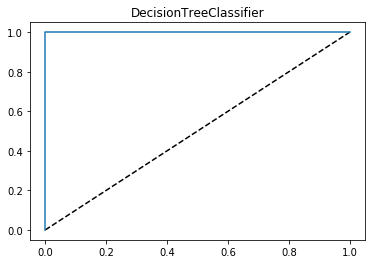

In [54]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label="DecisionTreeClassifier")
plt.title("DecisionTreeClassifier")
plt.show()

In [55]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
print(auc_score)

1.0


In [57]:
#Saving the Model
from sklearn.externals import joblib
joblib.dump(dtc,"Mushroom.pkl")

['Mushroom.pkl']